In [1]:
#import
import sys
import os

# Add the parent directory (project root) to the system path
sys.path.append(os.path.dirname(os.getcwd()))

# Now we can import from src
from src.data_loader import load_news_data, validate_news_data
from src.config import TICKERS

✅ Configuration loaded
📊 Analyzing 6 companies: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']


In [2]:
# %% [markdown]
# # 04 - Comprehensive Publisher Analysis
# ## Source Distribution, Specialization & Impact Analysis
#
# **Focus:** Publisher networks, content specialization, source credibility analysis

# %%
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../src')
from config import TICKERS

# Advanced styling
plt.style.use('seaborn-v0_8')
sns.set_palette("tab10")
company_colors = {'AAPL': '#A2AAAD', 'AMZN': '#FF9900', 'GOOG': '#4285F4', 
                  'META': '#1877F2', 'MSFT': '#737373', 'NVDA': '#76B900'}
%matplotlib inline

✅ Configuration loaded
📊 Analyzing 6 companies: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']


In [3]:
# %%
# Load processed text data
print("📥 LOADING PROCESSED DATA FOR PUBLISHER ANALYSIS...")
print("=" * 70)
try:
    df = pd.read_csv('../data/processed/02_text_analyzed_data.csv', parse_dates=['date'])
    print(f"✅ Loaded {len(df):,} articles with publisher information")
except:
    print("❌ Processed data not found. Run 02_text_analysis.ipynb first")
    raise

# Check if publisher data exists
if 'publisher' not in df.columns:
    print("❌ No publisher column found in dataset")
    raise Exception("Publisher data required for this analysis")

print(f"📰 Total Publishers: {df['publisher'].nunique()}")
print(f"🏢 Companies: {df['stock'].nunique()}")

📥 LOADING PROCESSED DATA FOR PUBLISHER ANALYSIS...
✅ Loaded 40 articles with publisher information
📰 Total Publishers: 15
🏢 Companies: 4


In [5]:
# %% [markdown]
# ## 📊 Publisher Distribution & Market Share

# %%
# Comprehensive publisher analysis
print("📊 PUBLISHER DISTRIBUTION & MARKET SHARE ANALYSIS")
print("=" * 70)

# Basic publisher statistics
publisher_stats = df['publisher'].value_counts()
total_articles = len(df)

print(f"📈 Publisher Statistics:")
print(f"   • Total publishers: {len(publisher_stats)}")
print(f"   • Top 10 publishers account for: {(publisher_stats.head(10).sum() / total_articles * 100):.1f}% of articles")
print(f"   • Average articles per publisher: {publisher_stats.mean():.1f}")
print(f"   • Median articles per publisher: {publisher_stats.median():.0f}")

# Market concentration (Herfindahl-Hirschman Index)
publisher_shares = (publisher_stats / total_articles) ** 2
hhi_index = publisher_shares.sum() * 10000
concentration_level = "HIGHLY CONCENTRATED" if hhi_index > 2500 else "MODERATELY CONCENTRATED" if hhi_index > 1500 else "COMPETITIVE"

# Calculate Gini coefficient manually
def calculate_gini(series):
    """Calculate Gini coefficient for inequality measurement"""
    sorted_series = np.sort(series)
    n = len(sorted_series)
    index = np.arange(1, n + 1)
    return (np.sum((2 * index - n - 1) * sorted_series)) / (n * np.sum(sorted_series))

gini_coefficient = calculate_gini(publisher_stats.values)

print(f"\n🏆 Market Concentration Analysis:")
print(f"   • HHI Index: {hhi_index:.0f} ({concentration_level})")
print(f"   • Gini Coefficient: {gini_coefficient:.3f}")

📊 PUBLISHER DISTRIBUTION & MARKET SHARE ANALYSIS
📈 Publisher Statistics:
   • Total publishers: 15
   • Top 10 publishers account for: 87.5% of articles
   • Average articles per publisher: 2.7
   • Median articles per publisher: 2

🏆 Market Concentration Analysis:
   • HHI Index: 1200 (COMPETITIVE)
   • Gini Coefficient: 0.420


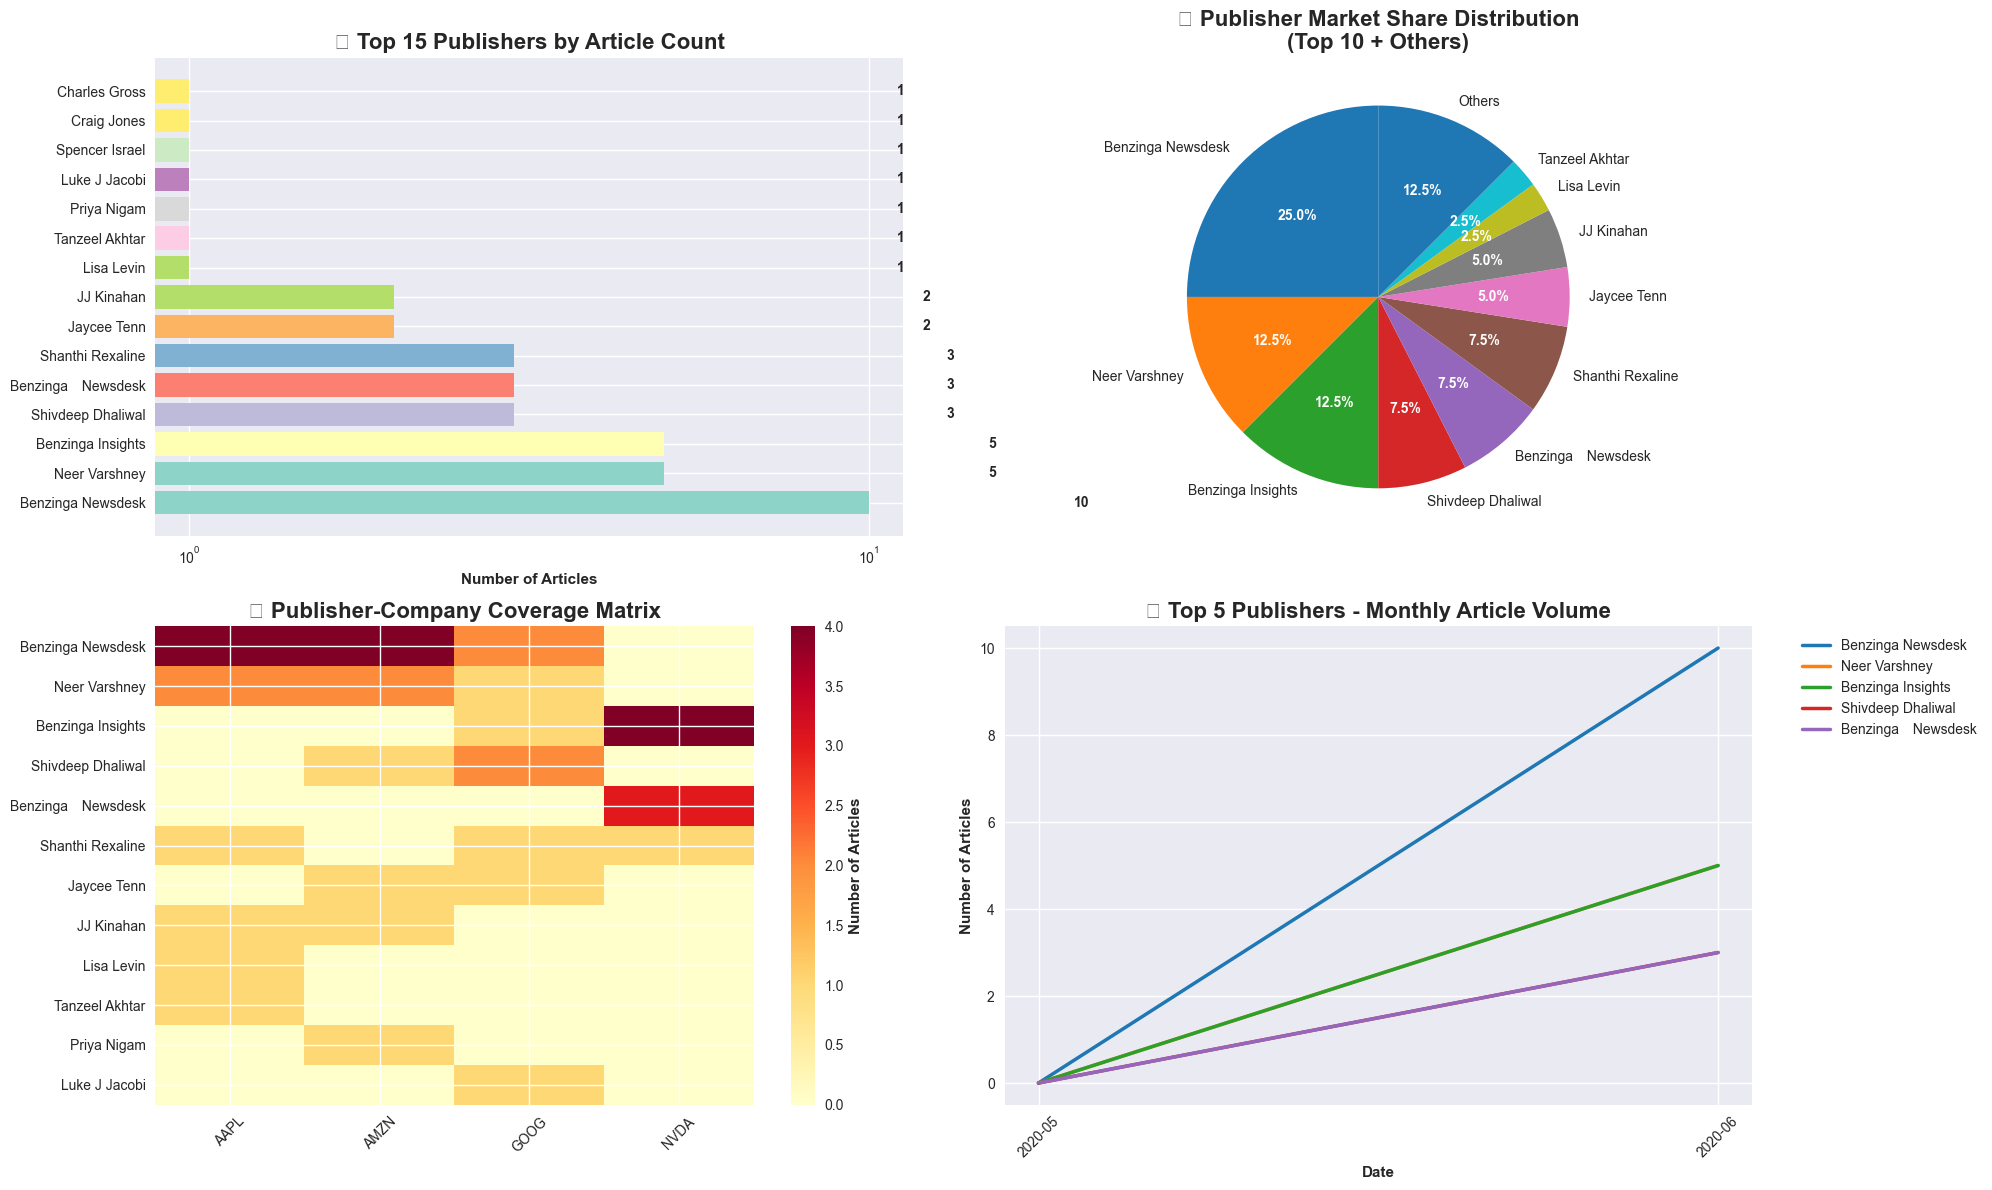

✅ Comprehensive publisher analysis completed!


In [6]:
# %% [markdown]
# ## 🎯 Advanced Publisher Visualizations

# %%
# Create comprehensive publisher visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# 1. Top publishers by article count (log scale)
top_publishers = publisher_stats.head(15)
bars = ax1.barh(range(len(top_publishers)), top_publishers.values, 
                color=plt.cm.Set3(np.linspace(0, 1, len(top_publishers))))
ax1.set_yticks(range(len(top_publishers)))
ax1.set_yticklabels(top_publishers.index)
ax1.set_title('🏆 Top 15 Publishers by Article Count', fontsize=16, fontweight='bold')
ax1.set_xlabel('Number of Articles', fontweight='bold')
ax1.set_xscale('log')

# Add value labels
for i, (bar, count) in enumerate(zip(bars, top_publishers.values)):
    ax1.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, 
             f'{count:,}', ha='left', va='center', fontweight='bold')

# 2. Publisher market share pie chart (top 10 + others)
top_10_publishers = publisher_stats.head(10)
others_count = publisher_stats[10:].sum()
market_share_data = pd.concat([top_10_publishers, pd.Series({'Others': others_count})])

wedges, texts, autotexts = ax2.pie(market_share_data.values, labels=market_share_data.index, 
                                   autopct='%1.1f%%', startangle=90)
ax2.set_title('📊 Publisher Market Share Distribution\n(Top 10 + Others)', fontsize=16, fontweight='bold')

# Make autotexts more readable
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 3. Publisher-company relationship matrix
publisher_company_matrix = pd.crosstab(df['publisher'], df['stock'])
# Get top publishers for visualization
top_publishers_for_matrix = publisher_stats.head(12).index
matrix_data = publisher_company_matrix.loc[top_publishers_for_matrix]

im = ax3.imshow(matrix_data, cmap='YlOrRd', aspect='auto')
ax3.set_xticks(range(len(matrix_data.columns)))
ax3.set_xticklabels(matrix_data.columns, rotation=45)
ax3.set_yticks(range(len(matrix_data.index)))
ax3.set_yticklabels(matrix_data.index)
ax3.set_title('📈 Publisher-Company Coverage Matrix', fontsize=16, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax3)
cbar.set_label('Number of Articles', fontweight='bold')

# 4. Publisher coverage timeline (if date column exists)
if 'date' in df.columns:
    df['year_month'] = df['date'].dt.to_period('M')
    monthly_publisher = df.groupby(['year_month', 'publisher']).size().unstack().fillna(0)
    top_5_publishers = publisher_stats.head(5).index
    
    # Plot only top 5 publishers for clarity
    for publisher in top_5_publishers:
        if publisher in monthly_publisher.columns:
            ax4.plot(monthly_publisher.index.astype(str), monthly_publisher[publisher], 
                    label=publisher, linewidth=2.5)
    
    ax4.set_title('📅 Top 5 Publishers - Monthly Article Volume', fontsize=16, fontweight='bold')
    ax4.set_xlabel('Date', fontweight='bold')
    ax4.set_ylabel('Number of Articles', fontweight='bold')
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax4.tick_params(axis='x', rotation=45)
else:
    # Alternative: Publisher article length distribution
    if 'article_length' in df.columns:
        top_pubs = publisher_stats.head(8).index
        boxplot_data = [df[df['publisher'] == pub]['article_length'] for pub in top_pubs]
        ax4.boxplot(boxplot_data, labels=top_pubs)
        ax4.set_title('📏 Article Length Distribution by Publisher', fontsize=16, fontweight='bold')
        ax4.set_ylabel('Article Length (characters)', fontweight='bold')
        ax4.tick_params(axis='x', rotation=45)
    else:
        ax4.text(0.5, 0.5, 'No date or article_length data available\nfor additional analysis', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('ℹ️ Additional Data Required', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Comprehensive publisher analysis completed!")